<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Model---Basic-Model" data-toc-modified-id="Load-Model---Basic-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Model - Basic Model</a></span><ul class="toc-item"><li><span><a href="#Model-Equations" data-toc-modified-id="Model-Equations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Model Equations</a></span></li><li><span><a href="#Calibrating-Relationships" data-toc-modified-id="Calibrating-Relationships-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Calibrating Relationships</a></span></li></ul></li><li><span><a href="#Solve-Steady-State" data-toc-modified-id="Solve-Steady-State-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Solve Steady State</a></span><ul class="toc-item"><li><span><a href="#Steady-State-Equations" data-toc-modified-id="Steady-State-Equations-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Steady State Equations</a></span></li></ul></li><li><span><a href="#Perturbation-Solution" data-toc-modified-id="Perturbation-Solution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Perturbation Solution</a></span><ul class="toc-item"><li><span><a href="#Blanchard-Kahn-Conditions" data-toc-modified-id="Blanchard-Kahn-Conditions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Blanchard-Kahn Conditions</a></span></li><li><span><a href="#Model-Statistics" data-toc-modified-id="Model-Statistics-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model Statistics</a></span></li></ul></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Simulation</a></span></li><li><span><a href="#Impulse-Response-Functions" data-toc-modified-id="Impulse-Response-Functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Impulse Response Functions</a></span></li><li><span><a href="#Covnert-to-Dynare" data-toc-modified-id="Covnert-to-Dynare-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Covnert to Dynare</a></span></li><li><span><a href="#Adding-a-steady-state-block" data-toc-modified-id="Adding-a-steady-state-block-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Adding a steady state block</a></span><ul class="toc-item"><li><span><a href="#Steady-State-Equations" data-toc-modified-id="Steady-State-Equations-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Steady-State Equations</a></span></li><li><span><a href="#Solve-Steady-State" data-toc-modified-id="Solve-Steady-State-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Solve Steady State</a></span></li><li><span><a href="#Perturbation-Solution" data-toc-modified-id="Perturbation-Solution-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Perturbation Solution</a></span></li><li><span><a href="#Impulse-Response-Functions" data-toc-modified-id="Impulse-Response-Functions-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Impulse Response Functions</a></span></li><li><span><a href="#Conversion-to-Dynare" data-toc-modified-id="Conversion-to-Dynare-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Conversion to Dynare</a></span></li></ul></li><li><span><a href="#Priors" data-toc-modified-id="Priors-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Priors</a></span><ul class="toc-item"><li><span><a href="#Model-Statistics" data-toc-modified-id="Model-Statistics-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Model Statistics</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Simulation</a></span></li><li><span><a href="#Useful-things-to-do-with-priors" data-toc-modified-id="Useful-things-to-do-with-priors-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Useful things to do with priors</a></span><ul class="toc-item"><li><span><a href="#Simulation-from-Prior" data-toc-modified-id="Simulation-from-Prior-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>Simulation from Prior</a></span></li><li><span><a href="#Steady-State-Bounds" data-toc-modified-id="Steady-State-Bounds-8.3.2"><span class="toc-item-num">8.3.2&nbsp;&nbsp;</span>Steady State Bounds</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import sys

sys.path.append("..")

import gEconpy as ge
import gEconpy.plotting as gp

import numpy as np
import sympy as sp

print(f"Running gEconpy version {ge.__version__}")

Running gEconpy version 1.2.1


# Load Model - Basic Model

This GCN file is fully compatable with the original R version of gEcon, and doesn't include any of the new features of gEconpy.

If you look at the file, it also includes an `options` and `tryreduce` block. Options doesn't do anything at the moment, but `tryreduce` will allow you to prune unnecessary equations from the model. If you specify a variable in the `tryreduce` block, gEconpy will check that the variable only occurs in a single equation. If so, that equation can be removed from the model without changing the solution.

Removing excess equations lightens the load on the numerical solvers, so if there are variables you aren't actually interseted in studying, remove them. In this case, we have asked for total utility and total cost to be removed.

In addition, gEconpy will automatically check for variables that have been defined as constants. In the perfect competition setup, prices (marginal costs) are set to 1. gEconpy notices this and substitutes away the marginal cost variable. 

In [2]:
file_path = "../GCN Files/RBC_basic.gcn"
model = ge.gEconModel(file_path, verbose=True)

Model Building Complete.
Found:
	9 equations
	9 variables
	The following variables were eliminated at user request:
		TC_t,U_t
	The following "variables" were defined as constants and have been substituted away:
		mc_t
	1 stochastic shock
		 0 / 1 has a defined prior. 
	6 parameters
		 0 / 6 has a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



## Model Equations

All the FoC are saved in the model object and can be manipulated using Sympy if needed

In [3]:
for eq in model.system_equations:
    display(eq)

-C_t - I_t + K_t-1*r_t + L_t*w_t

I_t - K_t + K_t-1*(1 - delta)

-lambda_t + C_t**(-sigma_C)

-L_t**sigma_L + lambda_t*w_t

beta*(lambda_t+1*r_t+1 - lambda_t+1*(delta - 1)) - lambda_t

A_t*K_t-1**alpha*L_t**(1 - alpha) - Y_t

alpha*A_t*K_t-1**(alpha - 1)*L_t**(1 - alpha) - r_t

A_t*K_t-1**alpha*(1 - alpha)/L_t**alpha - w_t

rho_A*log(A_t-1) + epsilon_A_t - log(A_t)

## Calibrating Relationships

In [4]:
for eq in model.calibrating_equations:
    display(eq)

# Solve Steady State

By default, the steady state is found using a combination of Sympy simplifications and scipy optimizers. It can be slow the first time it is run, but it builds a function which can be reused to re-solve the steady-state much more quickly. This is useful when sampling from the prior or posterior.

In [5]:
%time model.steady_state()

Steady state found! Sum of squared residuals is 6.695381126805323e-23
CPU times: user 492 ms, sys: 10.1 ms, total: 502 ms
Wall time: 501 ms


In [6]:
model.print_steady_state()

A_ss               1.000
C_ss               2.358
I_ss               0.715
K_ss              35.732
L_ss               0.820
Y_ss               3.073
lambda_ss          0.276
r_ss               0.030
w_ss               2.436


The function to solve a new steady state is called `f_ss`, and it takes a dictionary of free parameters as an input, and returns a dictionary summarizing the results of the steady state fitting. Notice now that the function is also instantaneous.

In [7]:
%time model.f_ss(model.free_param_dict);

CPU times: user 437 μs, sys: 23 μs, total: 460 μs
Wall time: 460 μs


## Steady State Equations

You also have access to the steady state equations, if you need them.

In [8]:
for eq in model.steady_state_system:
    display(eq)

-C_ss - I_ss + K_ss*r_ss + L_ss*w_ss

-delta*K_ss + I_ss

-lambda_ss + C_ss**(-sigma_C)

-L_ss**sigma_L + lambda_ss*w_ss

lambda_ss*(beta*(-delta + r_ss + 1) - 1)

A_ss*K_ss**alpha*L_ss**(1 - alpha) - Y_ss

alpha*A_ss*K_ss**(alpha - 1)*L_ss**(1 - alpha) - r_ss

(-A_ss*K_ss**alpha*(alpha - 1) - L_ss**alpha*w_ss)/L_ss**alpha

(rho_A - 1)*log(A_ss)

# Perturbation Solution

Like the steady state solution, the perturbation solution constructs a function to solve linearized system via perturbation. The first time you run the function will be slower. 

Following Dynare, the default pertubation solver is Cycle Reduction, implemented in Numba for faster execution. You can also ask for Gensys if you wish. The original gEcon used Gensys.

In [9]:
%time model.solve_model()

Solution found, sum of squared residuals:  3.980959555625145e-31
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000
CPU times: user 450 ms, sys: 6.76 ms, total: 457 ms
Wall time: 458 ms


The second run is much faster

In [10]:
%time model.solve_model()

Solution found, sum of squared residuals:  3.980959555625145e-31
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000
CPU times: user 473 μs, sys: 92 μs, total: 565 μs
Wall time: 513 μs


In [11]:
for name, policy_matrix in zip(["T", "R"], [model.T, model.R]):
    print(name.center(10).center(50, "="))
    print(policy_matrix.to_string())

====================    T     ====================
               A    C    I             K    L    Y  lambda    r    w
A       0.950000 -0.0 -0.0 -5.308123e-17 -0.0 -0.0    -0.0 -0.0 -0.0
C       0.309657  0.0  0.0  4.787472e-01  0.0  0.0     0.0  0.0  0.0
I       3.640697 -0.0 -0.0 -5.127277e-01 -0.0 -0.0    -0.0 -0.0 -0.0
K       0.072814 -0.0 -0.0  9.697454e-01 -0.0 -0.0    -0.0 -0.0 -0.0
L       0.206602  0.0  0.0 -1.566471e-01  0.0  0.0     0.0  0.0  0.0
Y       1.084291  0.0  0.0  2.481794e-01  0.0  0.0     0.0  0.0  0.0
lambda -0.464485  0.0  0.0 -7.181208e-01  0.0  0.0     0.0  0.0  0.0
r       1.084291  0.0  0.0 -7.518206e-01  0.0  0.0     0.0  0.0  0.0
w       0.877689  0.0  0.0  4.048265e-01  0.0  0.0     0.0  0.0  0.0
====================    R     ====================
        epsilon_A
A        1.000000
C        0.325955
I        3.832313
K        0.076646
L        0.217476
Y        1.141359
lambda  -0.488932
r        1.141359
w        0.923883


## Blanchard-Kahn Conditions

After you have a perturbation solution, you can check the Eigenvalues of the system to make sure the BK conditions are satisfied.

The output shows the eigenvalues computed by gensys: the modulus, real part, and imaginary part.

In [12]:
model.check_bk_condition()

Model solution has 2 eigenvalues greater than one in modulus and 2 forward-looking variables.
Blanchard-Kahn condition is satisfied.


,Modulus,Real,Imaginary
0,1.951878e-18,1.951878e-18,0.0
1,1.096047e-17,1.096047e-17,0.0
2,9.429945e-17,9.429945e-17,0.0
3,9.500000e-01,9.500000e-01,0.0
4,9.697454e-01,9.697454e-01,0.0
5,1.041615e+00,1.041615e+00,0.0
6,5.077961e+06,5.077961e+06,0.0


You can also visualize the Eigenvalues using `plot_eigenvalues` in the plotting functions.

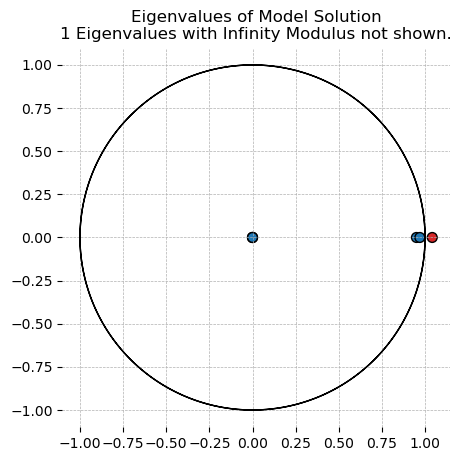

In [13]:
gp.plot_eigenvalues(model);

## Model Statistics

Functions to compute the stationary covariance matrix, as well as autocovariances for each variable, are also available.

In [14]:
sigma = model.compute_stationary_covariance_matrix()
acorr_matrix = model.compute_autocorrelation_matrix(n_lags=30)

/Users/jessegrabowski/Documents/Python/gEconpy/examples/../gEconpy/classes/model.py:854: UserWarning: No standard deviation provided for shocks epsilon_A. Using default of std = 0.01. Explicitypass variance information for these shocks or set their priors to silence this warning.
  warn(


In [15]:
sigma

,A,C,I,K,L,Y,lambda,r,w
A,0.102564,0.078837,0.344429,0.099835,0.007448,0.140601,-0.118255,0.045758,0.133152
C,0.078837,0.097039,0.225722,0.150552,-0.006198,0.126964,-0.145559,-0.022053,0.133163
I,0.344429,0.225722,1.198454,0.256210,0.037783,0.451931,-0.338583,0.214950,0.414149
K,0.099835,0.150552,0.256210,0.246693,-0.016902,0.175123,-0.225828,-0.071376,0.192025
L,0.007448,-0.006198,0.037783,-0.016902,0.004442,0.004030,0.009297,0.022047,-0.000413
Y,0.140601,0.126964,0.451931,0.175123,0.004030,0.202536,-0.190447,0.033062,0.198506
lambda,-0.118255,-0.145559,-0.338583,-0.225828,0.009297,-0.190447,0.218338,0.033080,-0.199744
r,0.045758,-0.022053,0.214950,-0.071376,0.022047,0.033062,0.033080,0.110281,0.011014
w,0.133152,0.133163,0.414149,0.192025,-0.000413,0.198506,-0.199744,0.011014,0.198919


You can also plot the covaraince matrix as a heatmap using `gp.plot_covariance_heatmap`

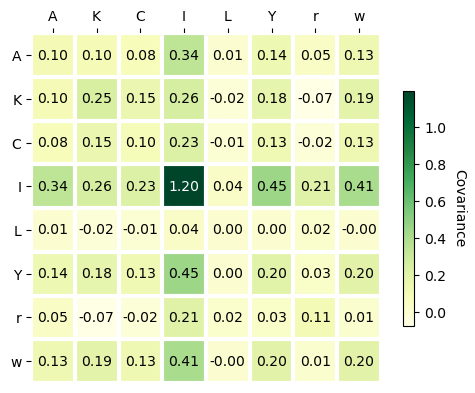

In [16]:
gp.plot_covariance_matrix(
    sigma,
    ["A", "K", "C", "I", "L", "Y", "r", "w"],
    figsize=(5, 5),
    cbar_kw=dict(shrink=0.5),
);

Similarly, there is a function to plot the autocorrelation functions, `plot_acf`

In [17]:
acorr_matrix

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
A,1.0,0.950000,0.902500,0.857375,0.814506,0.773781,0.735092,0.698337,0.663420,0.630249,...,0.358486,0.340562,0.323534,0.307357,0.291989,0.277390,0.263520,0.250344,0.237827,0.225936
C,1.0,0.994328,0.987598,0.979904,0.971334,0.961969,0.951887,0.941158,0.929851,0.918027,...,0.768105,0.753679,0.739249,0.724836,0.710462,0.696145,0.681903,0.667750,0.653701,0.639770
I,1.0,0.936704,0.876975,0.820622,0.767466,0.717334,0.670064,0.625503,0.583505,0.543930,...,0.235620,0.216647,0.198840,0.182134,0.166468,0.151784,0.138026,0.125143,0.113085,0.101806
K,1.0,0.999213,0.996976,0.993407,0.988616,0.982707,0.975777,0.967916,0.959211,0.949739,...,0.813244,0.799204,0.785059,0.770841,0.756577,0.742291,0.728007,0.713747,0.699530,0.685374
L,1.0,0.942414,0.887937,0.836407,0.787668,0.741576,0.697992,0.656783,0.617826,0.581002,...,0.288388,0.269865,0.252392,0.235914,0.220376,0.205728,0.191923,0.178914,0.166658,0.155116
Y,1.0,0.967306,0.935722,0.905210,0.875732,0.847250,0.819729,0.793135,0.767435,0.742598,...,0.518401,0.501843,0.485829,0.470341,0.455361,0.440872,0.426857,0.413299,0.400184,0.387497
lambda,1.0,0.994328,0.987598,0.979904,0.971334,0.961969,0.951887,0.941158,0.929851,0.918027,...,0.768105,0.753679,0.739249,0.724836,0.710462,0.696145,0.681903,0.667750,0.653701,0.639770
r,1.0,0.936485,0.876555,0.820018,0.766692,0.716405,0.668994,0.624305,0.582190,0.542510,...,0.233599,0.214608,0.196788,0.180074,0.164403,0.149717,0.135962,0.123083,0.111033,0.099764
w,1.0,0.978304,0.956837,0.935612,0.914644,0.893943,0.873519,0.853383,0.833541,0.814000,...,0.620035,0.604344,0.588975,0.573925,0.559192,0.544772,0.530665,0.516865,0.503370,0.490176


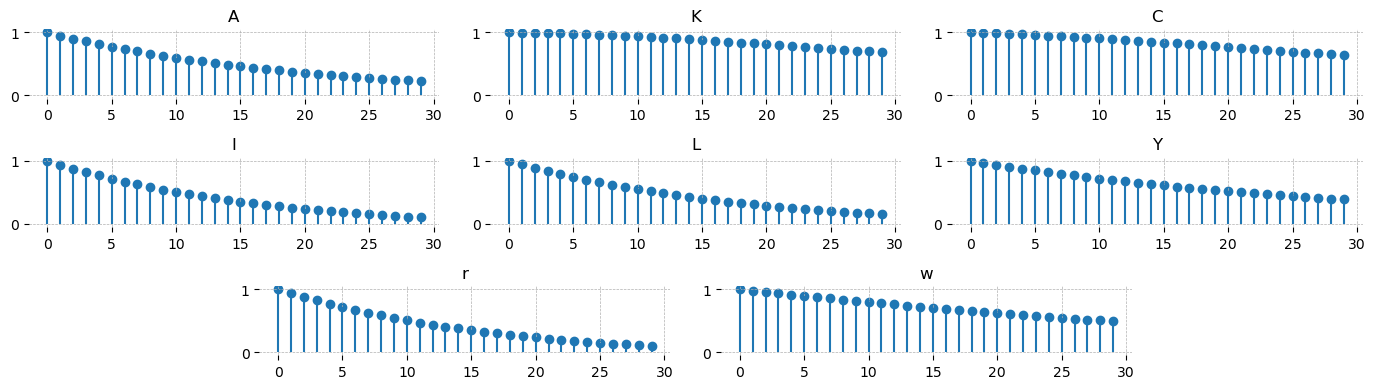

In [18]:
gp.plot_acf(
    acorr_matrix, vars_to_plot=["A", "K", "C", "I", "L", "Y", "r", "w"], n_cols=3
);

# Simulation

You can simulate the model by passing a covariance matrix for the shocks. The default is a spaghetti plot, but you can also ask for confidence intervals if you prefer a cleaner look.

In [19]:
simulation = model.simulate(shock_cov_matrix=np.eye(1) * 0.01, n_simulations=100)

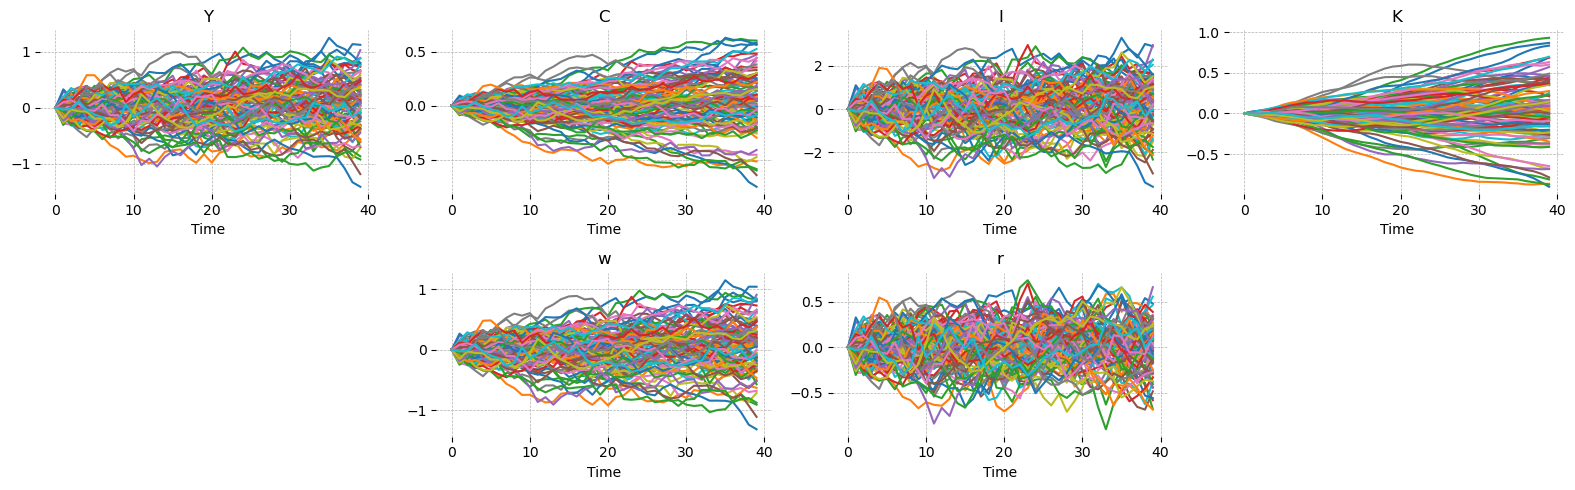

In [20]:
gp.plot_simulation(
    simulation, vars_to_plot=["Y", "C", "I", "K", "w", "r"], n_cols=4, figsize=(16, 5)
);

The confidence intervals need plenty of simulations or else they come out looking quite "jagged".

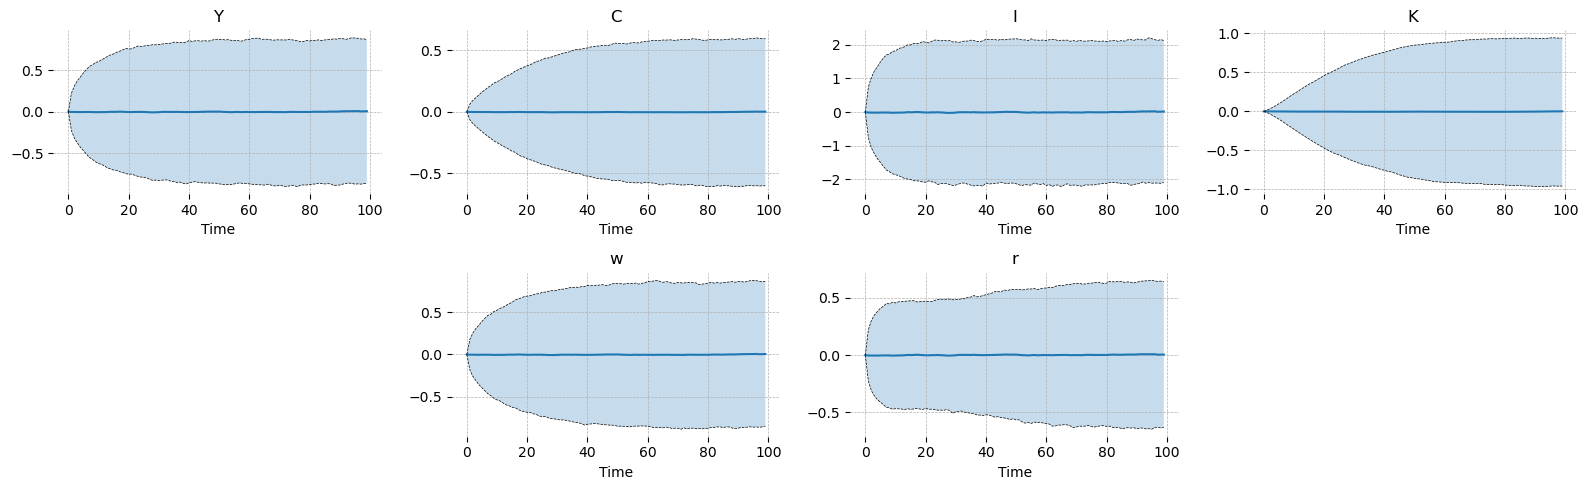

In [21]:
simulation = model.simulate(
    shock_cov_matrix=np.eye(1) * 0.01, n_simulations=10_000, simulation_length=100
)
gp.plot_simulation(
    simulation,
    vars_to_plot=["Y", "C", "I", "K", "w", "r"],
    ci=0.95,
    n_cols=4,
    figsize=(16, 5),
);

With a large number of simulations you can also compute sample statistics and verify the stationary solution. Evidently they match to about the 2nd decimal place with 10_000 samples at T=99. One could extend `simulation_length` and increase `n_simulations` to obtain more accurate estimates.

In [22]:
import pandas as pd

tols = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
accuracy_df = pd.DataFrame(0, columns=tols, index=simulation.index)
for tol in tols:
    accuracy_df[tol] = (
        (simulation.xs(axis=1, key=99).T.cov() - sigma).abs() < tol
    ).all()
print(
    "Absolute difference between stationary covariance matrix and sample covariance matrix is less than:"
)
print(accuracy_df.to_string())

Absolute difference between stationary covariance matrix and sample covariance matrix is less than:
           0.10000  0.01000  0.00100  0.00010  0.00001
Variables                                             
A             True    False    False    False    False
C             True     True    False    False    False
I             True    False    False    False    False
K             True    False    False    False    False
L             True     True     True    False    False
Y             True    False    False    False    False
lambda        True    False    False    False    False
r             True     True    False    False    False
w             True    False    False    False    False


# Impulse Response Functions

They are impulse repsonse functions. Not much to say. The plots start from 0 and the shock enters at 1, which is different from Dynare, which starts the plot at the period the shock enters. The `irf` object returned by the `model.impulse_response_function` method is just a Pandas dataframe, so you can slice it as you like to customize the plots.

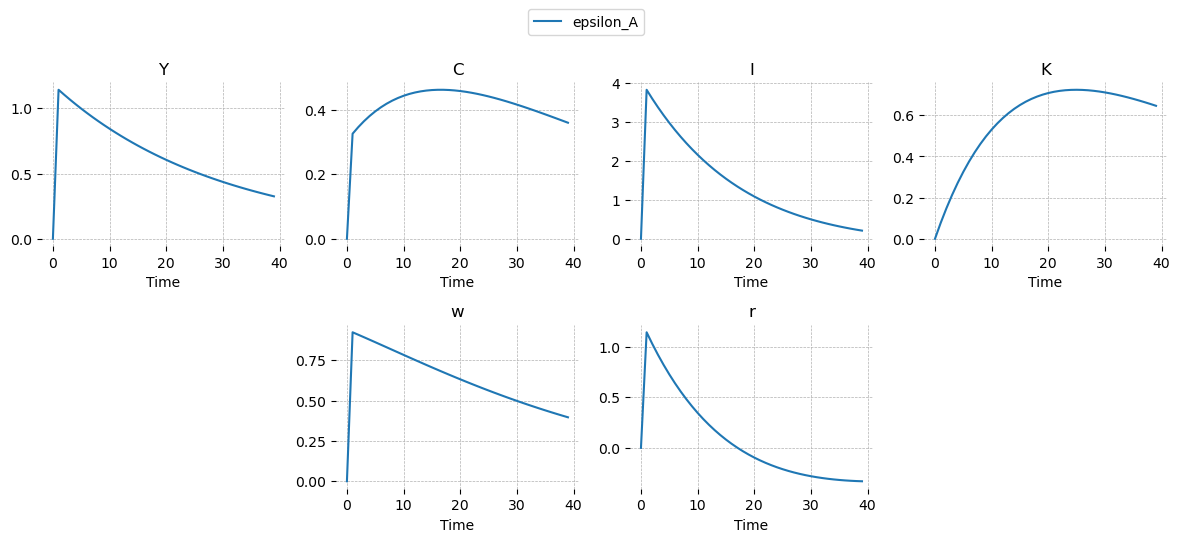

In [23]:
irf = model.impulse_response_function()
gp.plot_irf(
    irf,
    vars_to_plot=["Y", "C", "I", "K", "w", "r"],
    n_cols=4,
    figsize=(12, 5),
    legend=True,
);

# Covnert to Dynare

Since Dynare remains the gold standard for DSGE model analysis, gEconpy can convert the model into a Dynare `.mod` file. Greek variable names are automatically prefixed with either `var_` or `param_`, to avoid any namespace collisions in Matlab. 

In [24]:
print(ge.make_mod_file(model))

var A, C, I, K, L, Y, r, var_lambda, w;
varexo epsilon_A;

parameters param_alpha, param_beta, param_delta, rho_A;
parameters sigma_C, sigma_L;

param_alpha = 0.35;
param_beta = 0.99;
param_delta = 0.02;
rho_A = 0.95;
sigma_C = 1.5;
sigma_L = 2.0;

model;
-C - I + K(-1) * r + L * w = 0;
I - K + K(-1) *(1 - param_delta) = 0;
-var_lambda + C ^(- sigma_C) = 0;
-L ^ sigma_L + var_lambda * w = 0;
param_beta *(r(1) * var_lambda(1) - var_lambda(1) *(param_delta - 1)) - var_lambda = 0;
A * K(-1) ^ param_alpha * L ^(1 - param_alpha) - Y = 0;
A * K(-1) ^(param_alpha - 1) * L ^(1 - param_alpha) * param_alpha - r = 0;
A * K(-1) ^ param_alpha *(1 - param_alpha) / L ^ param_alpha - w = 0;
epsilon_A + rho_A * log(A(-1)) - log(A) = 0;
end;

initval;
A = 1.0000;
C = 2.3584;
I = 0.7146;
K = 35.7323;
L = 0.8201;
Y = 3.0731;
var_lambda = 0.2761;
r = 0.0301;
w = 2.4358;
end;

steady;
check(qz_zero_threshold=1e-20);

shocks;
var epsilon_A;
stderr 0.01;
end;

stoch_simul(order=1, irf=100, qz_zero_threshold=1

# Adding a steady state block

RBC_steady_state.gcn shows how you can define a steady state in the GCN file to make the job of the numerical solver easier. 

* If you provide a complete steady-state solution, gEconpy will check the residuals of your solution and report if there is an error, but will not resort to using a numerical solver.

* If you provide a partial steady-state solution, the relationships you provide will be substituted into the remaining equations, the system will be reduced via Sympy.simplify, and the remaining system of equations will be passed to the numerical solver.

In [25]:
file_path = "../GCN Files/RBC_steady_state.gcn"
model = ge.gEconModel(file_path, verbose=True)

Model Building Complete.
Found:
	9 equations
	9 variables
	The following variables were eliminated at user request:
		TC_t,U_t
	The following "variables" were defined as constants and have been substituted away:
		P_t
	1 stochastic shock
		 0 / 1 has a defined prior. 
	6 parameters
		 0 / 6 has a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



## Steady-State Equations

Steady state equations are stored in the `model.steady_state_relationships` dictionary, with string keys of the form "Y_ss". I convert them to TimeAwareSymbols here to show the equations.

Admittedly, they aren't very easy to read in sympy. This could maybe be improved by adding additional assumptions to the variables (positive only, real only, etc), and using some clever arguments on `sp.simplify`. I'm not a Sympy expert.

Note that in this example, I have entered the entire steady state solution. In a more complex model, this may not be possible. In that case, you can pass only a subset of steady state relationships, and allow the combination of the heuristic solver and scipy optimizer to find everything else. 

Either way, for anything beyond a simple model, it is strongly recommended to pass as much steady state information as possible.

In [26]:
from gEconpy.classes.time_aware_symbol import TimeAwareSymbol

for var, eq in model.steady_state_relationships.items():
    sp_var = TimeAwareSymbol(var.split("_")[0], time_index="ss")
    display(sp.Eq(sp_var, eq))

Eq(A_ss, 1.0)

Eq(C_ss, (((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha))**(sigma_L + 1)/(1 - alpha)**sigma_L)**(1/sigma_C)*(((-(1 - delta) + 1/beta)/(-alpha*delta - (1 - delta) + 1/beta))**(sigma_C/(sigma_C + sigma_L))*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha)*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha)))**sigma_L)**(1/(sigma_C + sigma_L)))**((-sigma_L)/sigma_C))

Eq(I_ss, alpha*delta*((-(1 - delta) + 1/beta)/(-alpha*delta - (1 - delta) + 1/beta))**(sigma_C/(sigma_C + sigma_L))*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha)*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha)))**sigma_L)**(1/(sigma_C + sigma_L))/(-(1 - delta) + 1/beta))

Eq(K_ss, alpha*((-(1 - delta) + 1/beta)/(-alpha*delta - (1 - delta) + 1/beta))**(sigma_C/(sigma_C + sigma_L))*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha)*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha)))**sigma_L)**(1/(sigma_C + sigma_L))/(-(1 - delta) + 1/beta))

Eq(L_ss, ((-(1 - delta) + 1/beta)/(-alpha*delta - (1 - delta) + 1/beta))**(sigma_C/(sigma_C + sigma_L))*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha)*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha)))**sigma_L)**(1/(sigma_C + sigma_L))/(alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha)))

Eq(P_ss, 1.0)

Eq(TC_ss, -alpha*((-(1 - delta) + 1/beta)/(-alpha*delta - (1 - delta) + 1/beta))**(sigma_C/(sigma_C + sigma_L))*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha)*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha)))**sigma_L)**(1/(sigma_C + sigma_L)) - ((-(1 - delta) + 1/beta)/(-alpha*delta - (1 - delta) + 1/beta))**(sigma_C/(sigma_C + sigma_L))*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha)*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha)))**sigma_L)**(1/(sigma_C + sigma_L))*(1 - alpha))

Eq(U_ss, (((((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha))**(sigma_L + 1)/(1 - alpha)**sigma_L)**(1/sigma_C)*(((-(1 - delta) + 1/beta)/(-alpha*delta - (1 - delta) + 1/beta))**(sigma_C/(sigma_C + sigma_L))*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha)*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha)))**sigma_L)**(1/(sigma_C + sigma_L)))**((-sigma_L)/sigma_C))**(1 - sigma_C)/(1 - sigma_C) - (((-(1 - delta) + 1/beta)/(-alpha*delta - (1 - delta) + 1/beta))**(sigma_C/(sigma_C + sigma_L))*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha)*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha)))**sigma_L)**(1/(sigma_C + sigma_L))/(alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha)))**(sigma_L + 1)/(sigma_L + 1))/(1 - beta))

Eq(Y_ss, ((-(1 - delta) + 1/beta)/(-alpha*delta - (1 - delta) + 1/beta))**(sigma_C/(sigma_C + sigma_L))*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha)*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha)))**sigma_L)**(1/(sigma_C + sigma_L)))

Eq(lambda_ss, ((((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha))**(sigma_L + 1)/(1 - alpha)**sigma_L)**(1/sigma_C)*(((-(1 - delta) + 1/beta)/(-alpha*delta - (1 - delta) + 1/beta))**(sigma_C/(sigma_C + sigma_L))*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha)*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha)))**sigma_L)**(1/(sigma_C + sigma_L)))**((-sigma_L)/sigma_C))**(-sigma_C))

Eq(q_ss, ((((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha))**(sigma_L + 1)/(1 - alpha)**sigma_L)**(1/sigma_C)*(((-(1 - delta) + 1/beta)/(-alpha*delta - (1 - delta) + 1/beta))**(sigma_C/(sigma_C + sigma_L))*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha)*((alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha)))**sigma_L)**(1/(sigma_C + sigma_L)))**((-sigma_L)/sigma_C))**(-sigma_C))

Eq(r_ss, -(1 - delta) + 1/beta)

Eq(w_ss, (alpha/(-(1 - delta) + 1/beta))**(alpha/(1 - alpha))*(1 - alpha))

## Solve Steady State

Since the entire steady state is provided, it solves much more quickly. Several expensive symbolic reduction loops are skipped.

In [27]:
%time model.steady_state()
model.print_steady_state()

Steady state found! Sum of squared residuals is 1.140814196572275e-28
CPU times: user 1.07 s, sys: 13.2 ms, total: 1.08 s
Wall time: 1.08 s
A_ss               1.000
C_ss               2.358
I_ss               0.715
K_ss              35.732
L_ss               0.820
Y_ss               3.073
lambda_ss          0.276
r_ss               0.030
w_ss               2.436


Nevertheless, you still get additonal speedup after the solution function is complied in the first execution.

In [28]:
%time model.steady_state()

Steady state found! Sum of squared residuals is 1.140814196572275e-28
CPU times: user 363 μs, sys: 12 μs, total: 375 μs
Wall time: 368 μs


## Perturbation Solution

Sadly, nothing special happens in the perturbation solver.

In [29]:
model.solve_model()

Solution found, sum of squared residuals:  2.425259481224941e-31
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


In [30]:
for name, policy_matrix in zip(["T", "R"], [model.T, model.R]):
    print(name.center(10).center(50, "="))
    print(policy_matrix.to_string())

====================    T     ====================
               A    C    I             K    L    Y  lambda    r    w
A       0.950000 -0.0 -0.0 -8.203114e-17 -0.0 -0.0    -0.0 -0.0 -0.0
C       0.309657  0.0  0.0  4.787472e-01  0.0  0.0     0.0  0.0  0.0
I       3.640697 -0.0 -0.0 -5.127277e-01 -0.0 -0.0    -0.0 -0.0 -0.0
K       0.072814 -0.0 -0.0  9.697454e-01 -0.0 -0.0    -0.0 -0.0 -0.0
L       0.206602  0.0  0.0 -1.566471e-01  0.0  0.0     0.0  0.0  0.0
Y       1.084291  0.0  0.0  2.481794e-01  0.0  0.0     0.0  0.0  0.0
lambda -0.464485  0.0  0.0 -7.181208e-01  0.0  0.0     0.0  0.0  0.0
r       1.084291  0.0  0.0 -7.518206e-01  0.0  0.0     0.0  0.0  0.0
w       0.877689  0.0  0.0  4.048265e-01  0.0  0.0     0.0  0.0  0.0
====================    R     ====================
        epsilon_A
A        1.000000
C        0.325955
I        3.832313
K        0.076646
L        0.217476
Y        1.141359
lambda  -0.488932
r        1.141359
w        0.923883


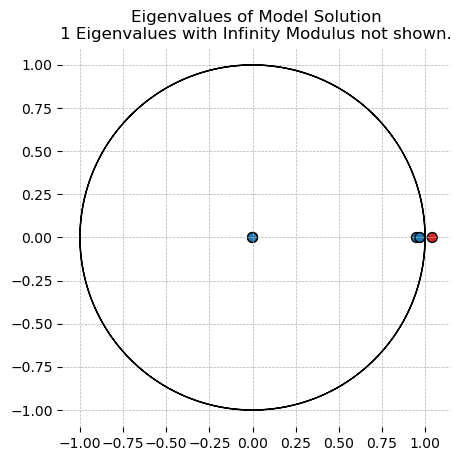

In [31]:
gp.plot_eigenvalues(model);

## Impulse Response Functions

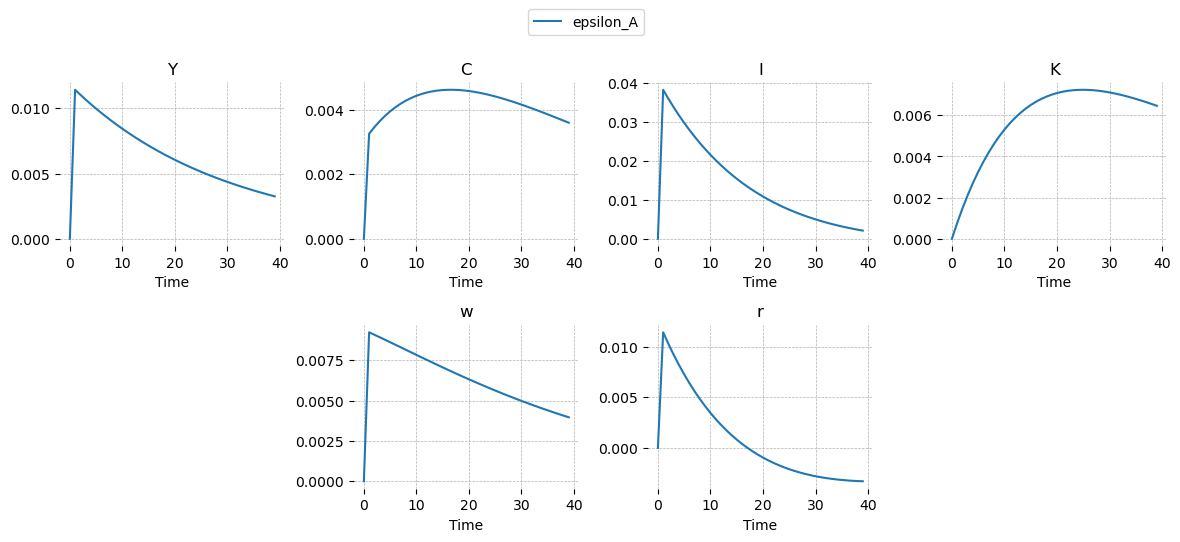

In [32]:
irf = model.impulse_response_function(shock_size=0.01, simulation_length=40)

gp.plot_irf(
    irf,
    shocks_to_plot=["epsilon_A"],
    vars_to_plot=["Y", "C", "I", "K", "w", "r"],
    n_cols=4,
    figsize=(12, 5),
    legend=True,
);

## Conversion to Dynare

I haven't added support for automatic conversion of steady state equations into a Dynare steady state block, but this is coming soon.

# Priors

With gEconpy, you can directly declare priors over parameters and shocks using a natural `~` notation. RBC_priors.gcn shows the following features:

1. Prior declaration

Priors are declared directly in the GCN file using the following notation:

```
sigma_C ~ N(mu=1.5, sd=0.1, lower=1.0) = 1.5;
sigma_L ~ N(loc=2.0, scale=0.1, lower=1.0) = 2.0;
```

These parameters are drawn from normal distributions, which can be parameterized using `loc` and `scale`, or `mu` and `sigma`. All supported distributions can be parameterized via their moments or via loc-scale-shape. See the scipy documentation of a distribution for details on the latter. Supported distributions are Normal, Beta, HalfNormal, Gamma, Inverse Gamma, Uniform, and Truncated Normal. These two distributions are actually truncated normals -- gEconpy will automatically try to convert a normal distribution to a truncated distribution if bounds, lower or upper, are declared.

The `=` sign after the distribution declares the initial value of the distribution.


2. Compound distributions

Distributions in gEconpy can be parameterized by other distributions. This is especially useful when declaring shock distributions:

```
shocks
{
    epsilon_A[] ~ N(mean=0, sd=sigma_epsilon);
};

calibration
{
    rho_A ~ Beta(mean=0.95, sd=0.04) = 0.95;
    sigma_epsilon ~ Inv_Gamma(mean=0.1, sd=0.01) = 0.01;
};
```

The technology innovation `epsilon_A` is a normal distribution with a random standard deviation that follows an inverse gamma distribution. When you ask for samples of `epsilon_A` from the model, it will automatically draw from the inverse_gamma, then draw from the normal conditional on the sampled value of `sigma_epsilon`.

Note also that `rho_A` is defined using the first and second moments of the beta distribution. One could also pass shape parameters `a` and `b`, or use `loc` and `scale` to further shift or scale the beta distribution.

Finally, note that because `epsilon_A` is a variable, not a parameter (it has `[]`), there is no initial value assigned after the distribution. An error will be raised if you try to give it one.

In [33]:
file_path = "../GCN Files/RBC_priors.gcn"
model = ge.gEconModel(file_path, verbose=True)

Model Building Complete.
Found:
	9 equations
	9 variables
	The following variables were eliminated at user request:
		TC_t,U_t
	The following "variables" were defined as constants and have been substituted away:
		mc_t
	1 stochastic shock
		 1 / 1 have a defined prior. 
	6 parameters
		 4 / 6 has a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



Initial values are whatever is given after the `=`, as explained above.

In [34]:
model.free_param_dict

{'alpha': 0.35,
 'beta': 0.99,
 'delta': 0.02,
 'rho_A': 0.95,
 'sigma_C': 1.5,
 'sigma_L': 2.0}

Priors are stored in two places. Parameters are in `model.param_priors`, while the shocks are in `model.shock_priors`

In [35]:
model.param_priors

{'sigma_C': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x136d2a300>,
 'sigma_L': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x1361be9f0>,
 'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x1363968d0>,
 'rho_A': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x1361be600>}

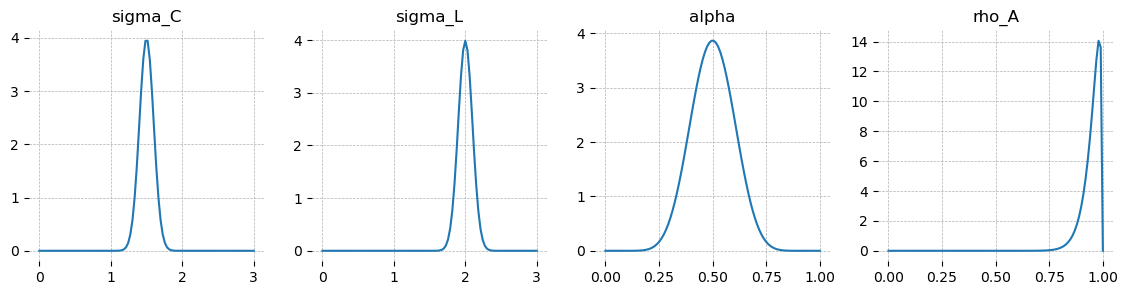

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(14, 3), dpi=100)
for axis, (param, d) in zip(fig.axes, model.param_priors.items()):
    lower, upper = d.a, d.b
    lower = max(lower, 0)
    upper = min(3, upper)
    x_grid = np.linspace(lower, upper, 100)
    axis.plot(x_grid, d.pdf(x_grid))
    axis.set(title=param)
    [spine.set_visible(False) for spine in axis.spines.values()]
    axis.grid(ls="--", lw=0.5)
plt.show()

As described above, `epsilon_A` is a composite distribution that first draws from `sigma_epsilon`, then draws from `epsilon_A`

In [37]:
model.shock_priors

{'epsilon_A': <gEconpy.parser.parse_distributions.CompositeDistribution at 0x1363979e0>}

The underlying distributions can be accessed if needed using `rv_params`, for "random variable parameters".

In [38]:
model.shock_priors["epsilon_A"].rv_params

{'scale': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x1360287d0>}

In [39]:
scale_grid = np.linspace(0.05, 0.15, 100)
eps_grid = np.linspace(-0.25, 0.25, 100)

xx, yy = np.meshgrid(scale_grid, eps_grid)

pdf_grid = [
    [
        model.shock_priors["epsilon_A"].pdf({"scale": scale, "obs": eps})
        for scale in scale_grid
    ]
    for eps in eps_grid
]

Compared to a standard Normal distribution, we get fatter tails by parameterizing the standard deviation with an inverse gamma distribution.

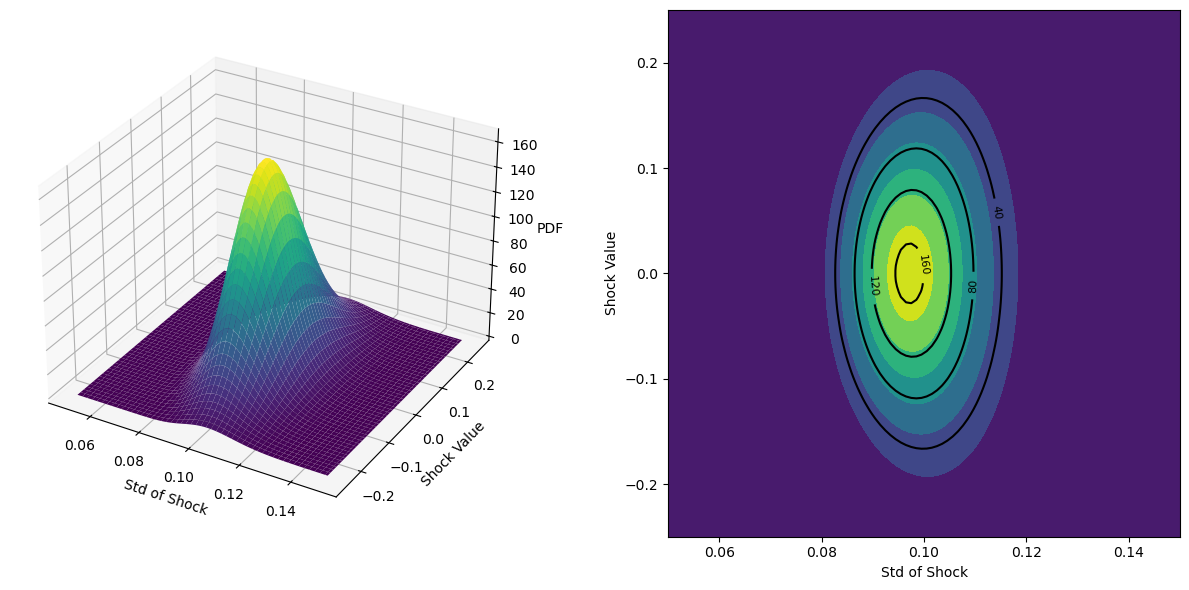

In [40]:
fig = plt.figure(figsize=(12, 6), dpi=100)
gs = fig.add_gridspec(1, 2)

axis = fig.add_subplot(gs[:, 0], projection="3d")
axis.plot_surface(xx, yy, np.array(pdf_grid), cmap="viridis")
axis.set(xlabel="Std of Shock", ylabel="Shock Value", zlabel="PDF")
axis = fig.add_subplot(gs[:, 1])
cs = axis.contour(xx, yy, pdf_grid, levels=4, colors="k")
axis.contourf(xx, yy, pdf_grid)
axis.clabel(cs, cs.levels, inline=True, fontsize=8)
axis.set(xlabel="Std of Shock", ylabel="Shock Value")
fig.tight_layout(w_pad=6)

In [41]:
model.steady_state()
model.print_steady_state()

Steady state found! Sum of squared residuals is 6.695381126805323e-23
A_ss               1.000
C_ss               2.358
I_ss               0.715
K_ss              35.732
L_ss               0.820
Y_ss               3.073
lambda_ss          0.276
r_ss               0.030
w_ss               2.436


In [42]:
model.solve_model()

Solution found, sum of squared residuals:  3.980959555625145e-31
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


## Model Statistics

Model statistics are computed at the initial values of the parameters -- there is no integration of the prior information into the stationary covariance matrix or autocorrelation function. 

## Simulation

Simulation becomes more conventient with defined priors, you don't need to pass a covariance matrix anymore. You still can -- doing so will draw innovations from a multivariate normal with the supplied covaraince matrix rather than from the prior distributions defined in the GCN file.

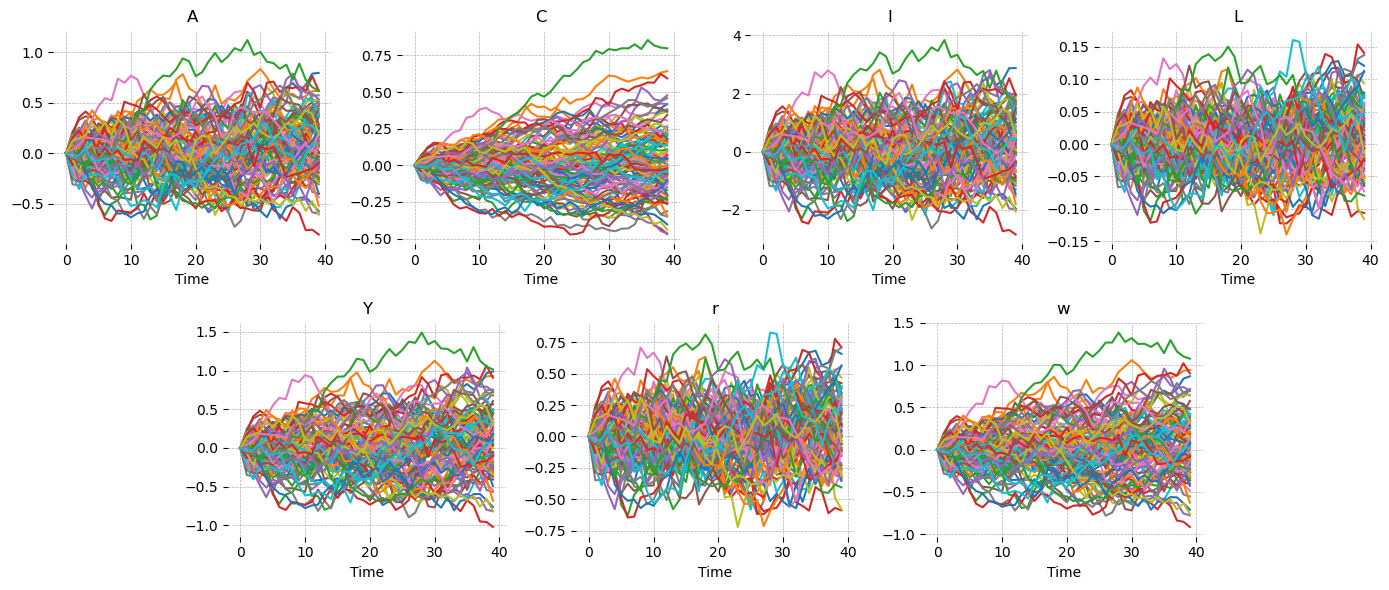

In [43]:
gp.plot_simulation(
    model.simulate(), figsize=(14, 6), vars_to_plot=["A", "C", "I", "L", "Y", "r", "w"]
);

## Useful things to do with priors

Researchers usually assign priors because they want to run a bayesian estimation of the model. This functionality is coming of course, but in the mean time there are other useful things one can do.

### Simulation from Prior

An excellent first step is to simulate model trajectories from draws of the prior, to see if they are reasonable. If your priors generate crazy outputs, they should probably be adjusted prior to estimation. The function `simulate_trajectories_from_prior` helps with this. It has 3 important parameters: `n_samples` is the number of draws from the prior, `n_simulations` is the number of trajectories to draw from each parameter combination sampled from the prior, and `simulation_length` controls the... length of the simulation.

This will return up to `n_samples x n_simulations x simulation_length` values, which can be a lot, so be aware it might take some time, especially if the prior produces samples in bad regions of the parameter space (see below).

In [44]:
simulations = ge.sampling.simulate_trajectories_from_prior(
    model, n_samples=1000, n_simulations=100, simulation_length=40
)

Sampling 1000 / 1000 [==================================================] elapsed: 00:11, remaining: 00:00, 89.75iter/sec


The spaghetti plots can take a long time to draw for these, passing a CI will speed things up considerably.

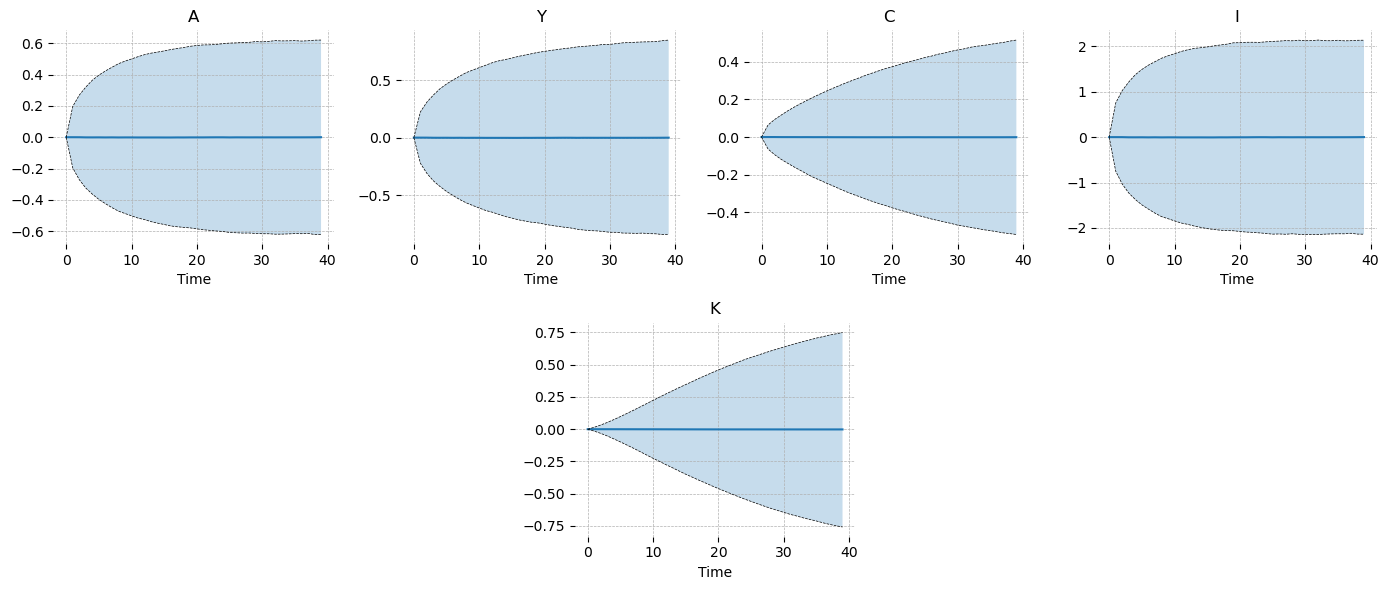

In [45]:
gp.plot_simulation(
    simulations, vars_to_plot=["A", "Y", "C", "I", "K"], figsize=(14, 6), ci=0.95
);

### Steady State Bounds

It is also possible that your priors will generate samples that are in regions of parameter space which have no associated steady state. You can check how the steady state handles different values from the priors using the `plot_prior_steady_state_solvability` function in the plotting tools.

Here it seems that the prior over `alpha` is much too wide -- after 0.5 the model isn't able to solve a steady state anymore. This would cause a lot of headaches for an MCMC sampler because of an apparent discontinunity in the parameter space. It could potentially be solved by providing steady state equations. Whether this discontinunity is a mathmatical feature of the model or whether it is an artefact from the numerical solver would need to be investigated.

Sampling 1000 / 1000 [==================================================] elapsed: 00:01, remaining: 00:00, 635.40iter/sec


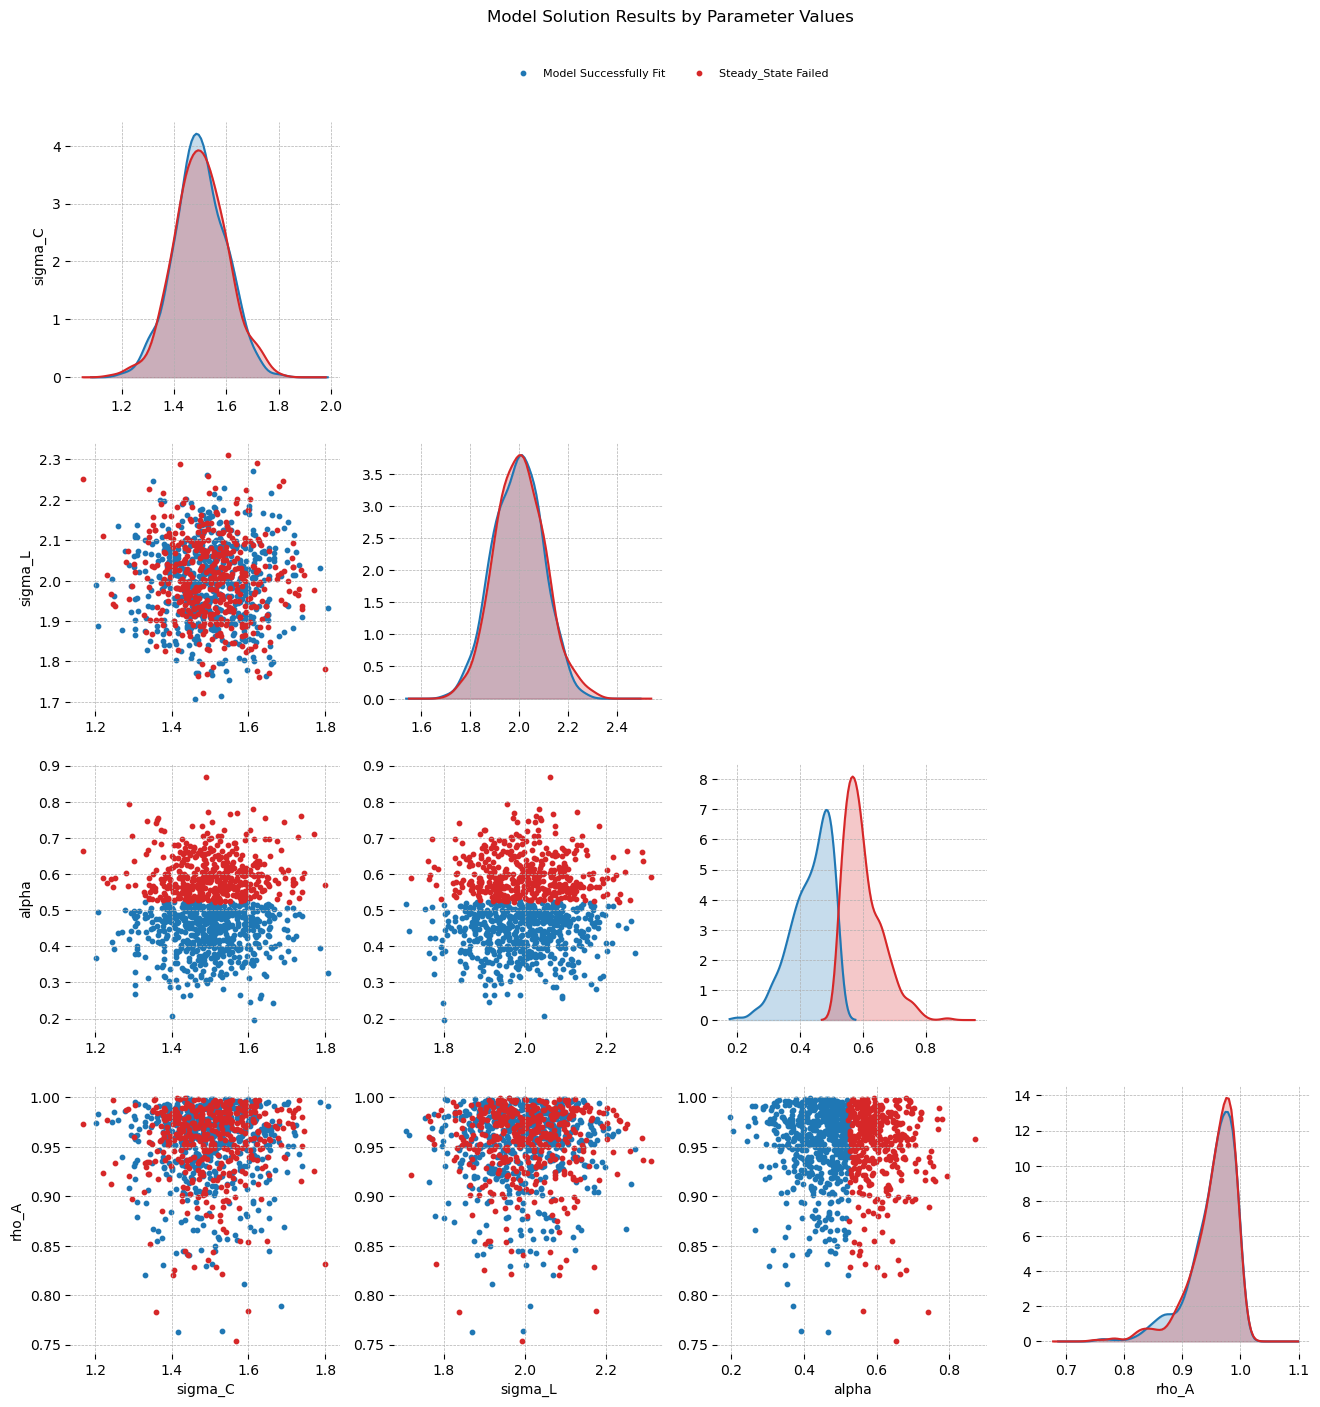

In [46]:
solve_data = ge.sampling.prior_solvability_check(model, n_samples=1000)
gp.plot_prior_solvability(solve_data);

You can change a prior by changing the GCN, or by directly assigning a new scipy distribution in the `model.param_priors` dictionary. Assigning a new prior is nice for testing, but it won't save to the GCN and will revert back the next time you load the model.

In [47]:
from scipy import stats

In [48]:
# The mean of a beta distribution is a / (a + b), and the variance is ab / ((a + b)^2 + (a + b + 1))
# Use sympy to solve for parameters a, b given desired moments.
from sympy.abc import a, b

eq1 = 0.2 - a / (a + b)
eq2 = 0.1 - sp.sqrt(a * b / (a + b) ** 2 / (a + b + 1))
a, b = sp.solve([eq1, eq2], a, b)[0]
print(a, b)
d = stats.beta(a=float(a), b=float(b))
d.stats()

3.00000000000000 12.0000000000000


(0.2, 0.01)

In [49]:
model.param_priors["alpha"] = d

After the change the model is much more sample efficient. It might be nice to hard-code a boundary at 0.5, but this is not currently supported with a beta distribution, because I haven't added improper priors. Currently, options would be to use a truncated normal or further shrink the variance.

Note that sampling the prior and repeatedly solving the steady state sped up considerably by shifting the piror to a better region of the parameter space.

Sampling 1000 / 1000 [==================================================] elapsed: 00:00, remaining: 00:00, 1661.69iter/sec


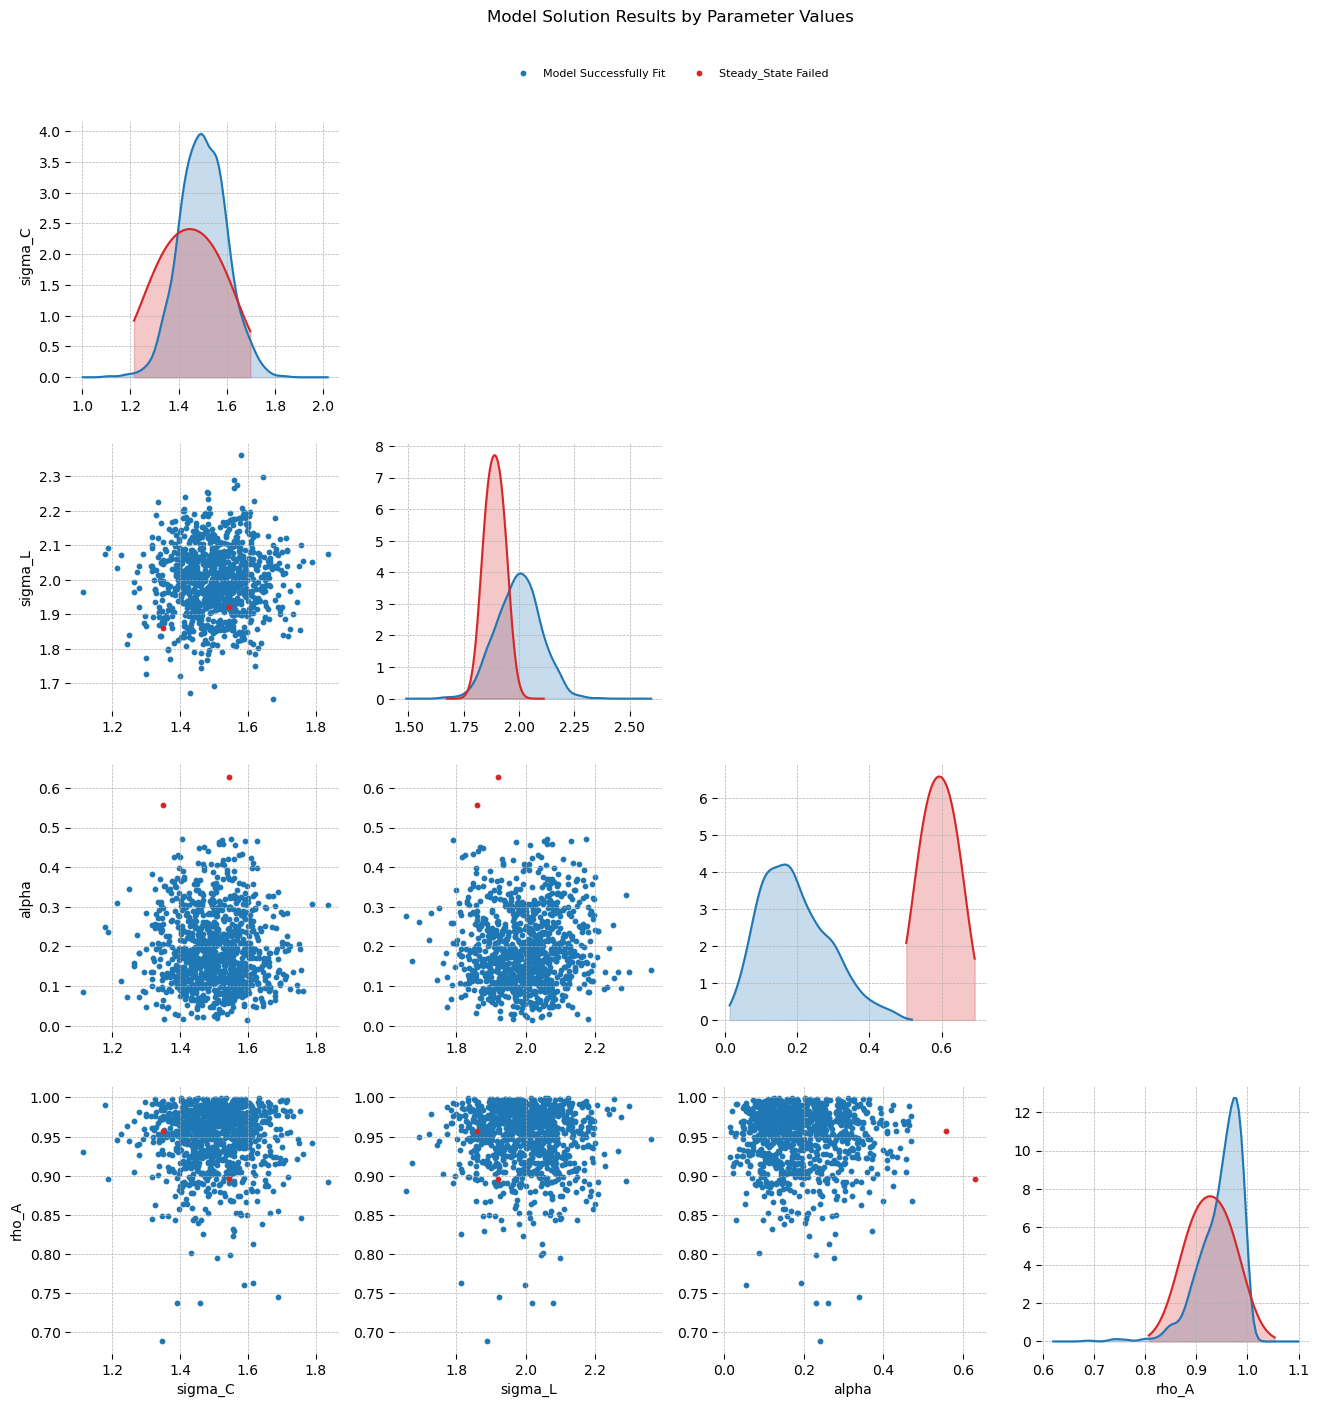

In [50]:
solve_data = ge.sampling.prior_solvability_check(model, n_samples=1000)
gp.plot_prior_solvability(solve_data);